# Netflix Top Ten

Text here

In [60]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import dataset
df = pd.read_csv('data/Edited Data/Netflix Top Ten with Info.csv', converters={'genre_ids': eval})
genres = pd.read_csv('data/edited data/tmdb genres.csv')

In [111]:
#prepare table for plotting
#assemble only columns relevant to the visualization
movie_genres = df.loc[:, ['Title', 'genre_ids', 'Viewership Score', 'Type']]

#expand list of genre ids
movie_genres = movie_genres.explode('genre_ids')

#merge in genre names
graph = movie_genres.merge(genres, left_on='genre_ids', right_on='id')

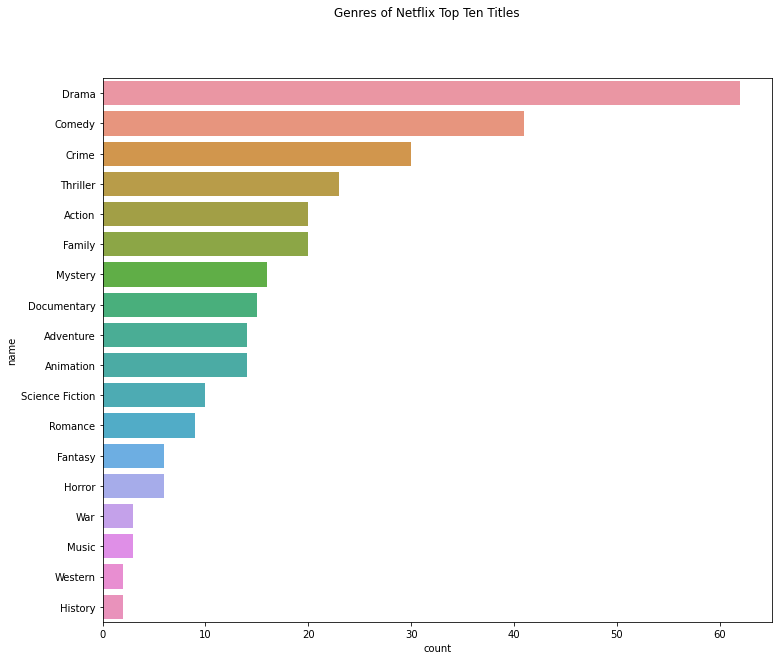

In [110]:
#create plot
fig = plt.figure(figsize=(12,10))
fig.suptitle('Genres of Netflix Top Ten Titles')
plt.xlabel('Count')
plt.ylabel('Genres')
sns.countplot(data=graph, y='name', order = graph['name'].value_counts().index);

We can see from this graph that dramas are much more popular than any other genre. Let's examine the dramas to see what they have in common

In [121]:
dramas = movie_genres.loc[(movie_genres['genre_ids'] == 18) & (movie_genres['Type'] == 'Movie')]
drama_details = dramas.merge(df, on='Title')
drama_details.drop(columns=['genre_ids_x', 'Type_x', 'Type_y', 'Viewership Score_y', 'first_air_date', 'id', 'media_type', 'name', 'origin_country'], inplace=True)
drama_details

In [140]:
list(drama_details['overview'][:10])

["A bestselling female novelist, suffering from writer's block, hires an innocent young woman to watch over her twin children. As the novelist dangerously indulges in her new best seller, the line between the life she's writing and the one she's living becomes blurred.",
 'A lone scientist in the Arctic races to contact a crew of astronauts returning home to a mysterious global catastrophe.',
 'A three-person crew on a mission to Mars faces an impossible choice when an unplanned passenger jeopardizes the lives of everyone on board.',
 "Two New Orleans paramedics' lives are ripped apart after encountering a series of horrific deaths linked to a designer drug with bizarre, otherworldly effects.",
 'Sent to live with his estranged father for the summer, a rebellious teen finds kinship in a tight-knit Philadelphia community of Black cowboys.',
 'Pot growers Ben and Chon face off against the Mexican drug cartel who kidnapped their shared girlfriend.',
 "A married couple's life is turned ups

Briefly examining the synopses for the ten most popular dramas on Netflix in 2021, isolation is a recurring theme. That makes a lot of sense when you consider the isolation we have all been dealing with during the pandemic--but this could also indicate that as restrictions ease, stories about isolation will become less popular.